## import the libraries

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import IPython.display as ipd
import librosa
import librosa.display
import os
import pandas as pd

ImportError: /home/ziahwadar/anaconda3/envs/tf/lib/python3.10/site-packages/zmq/backend/cython/../../../../.././libstdc++.so.6: version `GLIBCXX_3.4.30' not found (required by /home/ziahwadar/anaconda3/envs/tf/lib/python3.10/site-packages/scipy/fft/_pocketfft/pypocketfft.cpython-310-x86_64-linux-gnu.so)

## testing the audio using one file and displaying 

In [2]:
audio_file_path = '../audio/female audio wav/09 f.wav'
audio_data, sample_rate = librosa.load(audio_file_path, res_type='kaiser_fast')

In [3]:
sample_rate

22050

In [4]:
audio_data.shape

(732672,)

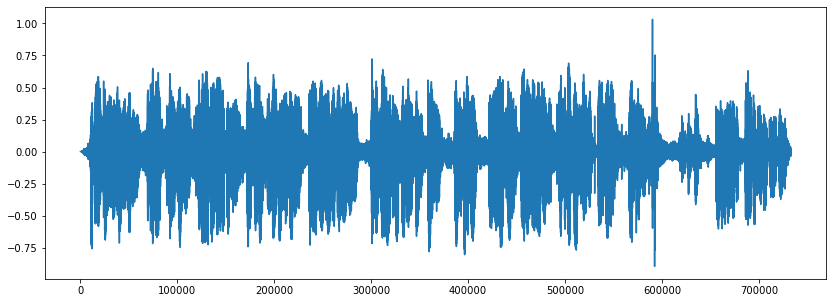

In [5]:
plt.figure(figsize=(14, 5))
plt.plot(audio_data)

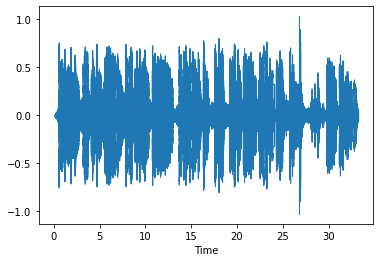

In [6]:
# still displaying the graph of the audio but using librosa

librosa.display.waveshow(audio_data, sr=sample_rate)
ipd.Audio(audio_file_path)

## using mfcc to extract the data for one file

In [7]:
mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
mfccs.shape

(40, 1432)

In [8]:
mfccs

array([[-5.2379242e+02, -5.2379242e+02, -5.1411871e+02, ...,
        -2.5926025e+02, -2.8413141e+02, -3.2088797e+02],
       [ 0.0000000e+00,  0.0000000e+00,  1.2946678e+01, ...,
         9.2737473e+01,  9.7695190e+01,  1.0280145e+02],
       [ 0.0000000e+00,  0.0000000e+00,  1.1029917e+01, ...,
         5.8469248e+00,  8.4039755e+00,  2.1031025e+01],
       ...,
       [ 0.0000000e+00,  0.0000000e+00,  3.4456739e-01, ...,
         2.3757100e+00,  4.1727881e+00,  1.2125781e-01],
       [ 0.0000000e+00,  0.0000000e+00,  9.0596294e-01, ...,
         3.6389971e-01,  5.9834108e+00,  2.4505484e+00],
       [ 0.0000000e+00,  0.0000000e+00,  7.8727579e-01, ...,
        -1.3348942e+00,  4.3032451e+00,  5.9606934e+00]], dtype=float32)

## function for extracting only one file using librosa and mfcc

In [9]:
def feature_extractor(filename):
    audio, sample_rate = librosa.load(filename, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    return mfccs_scaled_features

In [10]:
a = feature_extractor(audio_file_path)

In [11]:
len(a)

40

## extracting the features for a folder using librosa and mfcc
### extracting the voice for male

In [28]:
# spesifying the folder and then loop through it using the os.listdir

male_audio_folder = '../audio/male audio wav'
files = os.listdir(male_audio_folder)

In [29]:
# looping throgh a folder and appending all the audio dataset to data variable

data = []
for filename in files:
    file = os.path.join(male_audio_folder, filename)
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    data.append(mfccs_scaled_features)
    # checking if it is a file

In [30]:
male_extracted_feature = data

In [31]:
male_extracted_feature

[array([-2.4091745e+02,  1.5992264e+02,  2.0813704e+00,  3.5826007e-01,
        -1.5339595e+01,  1.8360535e+01, -7.3056979e+00, -1.5075273e+01,
        -1.2198603e+01, -1.9389304e+00, -1.6318914e+01, -4.3570089e+00,
        -8.4268659e-01, -1.0491154e+01, -6.9401312e+00, -2.4704435e+00,
        -1.2242377e+01, -8.6058788e+00, -8.1180372e+00, -8.3342447e+00,
        -9.3114252e+00, -3.8111737e+00, -1.1062697e+01, -4.4438906e+00,
        -7.0502605e+00, -3.7789595e+00, -6.6300926e+00, -3.2912970e+00,
        -2.1904643e+00,  1.2505212e+00,  2.2978981e-01,  1.6683184e+00,
         2.2030337e+00,  2.1230934e+00,  2.2551036e+00,  3.7236362e+00,
         2.3923283e+00,  3.5295992e+00,  2.3367426e+00,  5.9489769e-01],
       dtype=float32),
 array([-1.3899992e+02,  8.4773613e+01,  1.9476094e+00,  3.5508812e+01,
        -2.6152740e+00,  1.5470109e+01, -1.7986431e+01,  1.8231400e+01,
        -1.4379893e+01,  3.2371256e+00, -1.7833117e+01, -6.4852605e+00,
         5.4224935e+00, -5.2865853e+00, 

In [32]:
len(male_extracted_feature)

68

In [33]:
#creating a data frame with the extracted data 
#0ne==1==male and zero==0==female

male_df = pd.DataFrame({'features':male_extracted_feature, 'Gender':np.ones(len(male_extracted_feature))})

In [34]:
male_df

,features,Gender
0,"[-240.91745, 159.92264, 2.0813704, 0.35826007,...",1.0
1,"[-138.99992, 84.77361, 1.9476094, 35.508812, -...",1.0
2,"[-153.681, 77.19316, 26.751108, 37.27909, -13....",1.0
3,"[-133.40172, 81.541695, 29.62647, 36.93565, -1...",1.0
4,"[-200.25226, 109.53955, 4.53743, 37.070717, -1...",1.0
...,...,...
63,"[-146.37871, 101.148125, 19.428774, 40.11312, ...",1.0
64,"[-181.9637, 105.58604, 30.826223, 37.2138, -7....",1.0
65,"[-138.33415, 75.48301, 16.308605, 40.512802, -...",1.0
66,"[-155.16864, 95.517784, 22.478016, 30.271866, ...",1.0


## code to convert dataframe to list of numpy.ndarray

In [35]:
# splitting the data into dependent and independant dataset


#x = np.array(data_mfccs_scaled_features['features'].tolist())
#y = np.array(data_mfccs_scaled_features['Gender'].tolist())

In [36]:
b = np.array(male_df['Gender'].tolist())
c = np.array(male_df['features'].tolist())

### extracting female voice using female gender == 0

In [1]:
# spesifying the folder and then loop through it using the os.listdir

female_audio_folder = '../audio/female audio wav'
files = os.listdir(male_audio_folder)

NameError: name 'os' is not defined

In [ ]:
# looping throgh a folder and appending all the audio dataset to data variable

data = []
for filename in files:
    file = os.path.join(female_audio_folder, filename)
    audio, sample_rate = librosa.load(file)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    
    data.append(mfccs_scaled_features)
    # checking if it is a file

In [ ]:
female_extracted_features = data

In [ ]:
female_extracted_features

In [ ]:
len(female_extracted_features)

In [ ]:
#creating a data frame with the extracted data 
#0ne==1==male and zero==0==female

female_df = pd.DataFrame({'features':female_extracted_features, 'Gender':np.zeros(len(female_extracted_features))})

In [ ]:
female_df

## concatenate the both the famele with 0 and male with ones in one data frame

In [ ]:
extracted_df = pd.concat([male_df, female_df])

In [ ]:
extracted_df

In [ ]:
# reseting the index cuz the index is not well numbered

extracted_df.reset_index(inplace=True)

In [ ]:
extracted_df.drop(['index'], axis=1, inplace=True)

In [ ]:
extracted_df.head()

In [ ]:
from sklearn.model_selection import train_test_split

## converting the dataframe back to list of numpy.ndarray

In [ ]:
y = np.array(extracted_df['Gender'].tolist())
x = np.array(extracted_df['features'].tolist())

In [ ]:
y.shape

In [ ]:
x.shape

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
x_train

In [ ]:
y_train

## saving the x and y into in to x_data and y_data
### i comment the below code for saving bcos i dont want to be saving it anytime i run the code

In [1]:
# saving the file in a csv for modeling


np.savetxt('x_data.csv', x, delimiter=',')
np.savetxt('y_data.csv', y, delimiter=',')

NameError: name 'np' is not defined